In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import time
from IPython.display import clear_output

In [2]:
dat = sqlite3.connect('db.sqlite3')

# Select Device

In [6]:
dquery = dat.execute("SELECT * FROM main_device ")
dcols = [column[0] for column in dquery.description]
dresults = pd.DataFrame.from_records(data = dquery.fetchall(), columns = dcols)
dresults

,id,name,is_gateway
0,1,24:0a:c4:80:cb:b0,1
1,2,24:0a:c4:80:cd:84,0
2,3,30:ae:a4:00:97:a8,0


In [13]:
selected_device = 2
selected_device = dresults.loc[selected_device]
selected_device = selected_device['name']
selected_device

'30:ae:a4:00:97:a8'

# Show Data

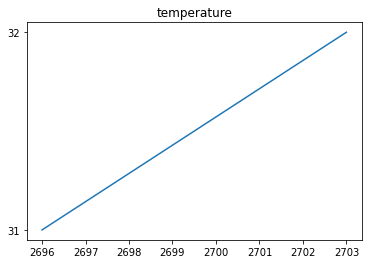

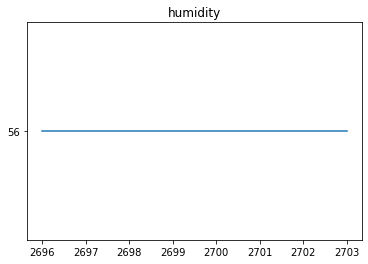

In [ ]:
while True:
    query = dat.execute("SELECT * FROM main_timeseries, main_device WHERE main_device.name='{}' AND main_timeseries.device_id = main_device.id".format(selected_device))
    cols = [column[0] for column in query.description]
    results = pd.DataFrame.from_records(data = query.fetchall(), columns = cols)
    keys = results['key'].unique()
    for key in keys:
        res = results[results['key'] == key]
        x = res['timestamp']
        y = res['value']
        plt.title(key)
        plt.plot(x, y)
        plt.show()
    time.sleep(3)
    clear_output(wait=True)